# **FLOWER** **RECOGNITION** **MODEL**

**1.Images of various types of flowers are collected and combined to form the train and test DataFrames**
 
**2.Images of 5 different categories of flowers are present in the data set**
 
     flowers=['daisy','sunflower','rose','dandelion','tulip']
 
**3.Shape of each image is initially  (48,48,3) and it is flattened into numpy array of size(6912)**

# **1. IMPORTING REQUIRED LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import DenseNet201
from keras.applications.densenet import preprocess_input,decode_predictions
from sklearn.metrics import accuracy_score
from keras.preprocessing import image

# **2. LOADING THE DATA**

In [2]:
train = pd.read_csv('/content/drive/MyDrive/MAJOR<Sanjay Kumar Nadigottu>/train.csv')
test = pd.read_csv('/content/drive/MyDrive/MAJOR<Sanjay Kumar Nadigottu>/test.csv')

In [3]:
print(train.shape)
print(test.shape)

(3457, 6913)
(866, 6913)


In [4]:
train.head()

,label,0,1,2,3,4,5,6,7,8,...,6902,6903,6904,6905,6906,6907,6908,6909,6910,6911
0,3.0,0.243137,0.301961,0.141176,0.203922,0.254902,0.086275,0.200000,0.250980,0.082353,...,0.000000,0.149020,0.250980,0.000000,0.168627,0.274510,0.003922,0.164706,0.282353,0.000000
1,4.0,0.454902,0.466667,0.384314,0.423529,0.443137,0.356863,0.462745,0.474510,0.400000,...,0.411765,0.396078,0.423529,0.537255,0.329412,0.333333,0.403922,0.329412,0.258824,0.415686
2,4.0,0.862745,0.670588,0.929412,0.737255,0.282353,0.717647,0.909804,0.454902,0.890196,...,0.313725,0.317647,0.352941,0.176471,0.325490,0.494118,0.282353,0.937255,0.509804,0.733333
3,0.0,0.345098,0.380392,0.117647,0.325490,0.356863,0.121569,0.317647,0.329412,0.105882,...,0.592157,0.690196,0.596078,0.454902,0.690196,0.596078,0.462745,0.674510,0.572549,0.435294
4,4.0,0.639216,0.117647,0.466667,0.517647,0.501961,0.466667,0.470588,0.458824,0.439216,...,0.000000,0.223529,0.368627,0.054902,0.000000,0.043137,0.000000,0.027451,0.082353,0.023529


In [5]:
test.head()

,label,0,1,2,3,4,5,6,7,8,...,6902,6903,6904,6905,6906,6907,6908,6909,6910,6911
0,3.0,0.015686,0.027451,0.000000,0.015686,0.027451,0.000000,0.003922,0.023529,0.000000,...,0.403922,0.811765,0.541176,0.411765,0.835294,0.549020,0.411765,0.827451,0.537255,0.384314
1,0.0,0.125490,0.247059,0.074510,0.184314,0.337255,0.090196,0.109804,0.243137,0.098039,...,0.686275,0.600000,0.647059,0.607843,0.596078,0.627451,0.576471,0.513725,0.556863,0.533333
2,3.0,0.003922,0.003922,0.003922,0.007843,0.007843,0.000000,0.003922,0.000000,0.015686,...,0.011765,0.003922,0.003922,0.011765,0.007843,0.003922,0.000000,0.007843,0.000000,0.003922
3,1.0,0.364706,0.525490,0.705882,0.439216,0.572549,0.749020,0.462745,0.600000,0.764706,...,0.039216,0.490196,0.325490,0.000000,0.352941,0.239216,0.082353,0.325490,0.211765,0.054902
4,3.0,0.321569,0.270588,0.105882,0.313725,0.266667,0.109804,0.333333,0.278431,0.125490,...,0.003922,0.192157,0.184314,0.000000,0.172549,0.164706,0.003922,0.180392,0.176471,0.003922


# **3. PREPARING THE DATA**

In [6]:
i_train = train.iloc[:,1:]
i_test = test.iloc[:,1:]
o_train = train['label']
o_test = test['label']


In [7]:
i_train.head()

,0,1,2,3,4,5,6,7,8,9,...,6902,6903,6904,6905,6906,6907,6908,6909,6910,6911
0,0.243137,0.301961,0.141176,0.203922,0.254902,0.086275,0.200000,0.250980,0.082353,0.239216,...,0.000000,0.149020,0.250980,0.000000,0.168627,0.274510,0.003922,0.164706,0.282353,0.000000
1,0.454902,0.466667,0.384314,0.423529,0.443137,0.356863,0.462745,0.474510,0.400000,0.494118,...,0.411765,0.396078,0.423529,0.537255,0.329412,0.333333,0.403922,0.329412,0.258824,0.415686
2,0.862745,0.670588,0.929412,0.737255,0.282353,0.717647,0.909804,0.454902,0.890196,0.788235,...,0.313725,0.317647,0.352941,0.176471,0.325490,0.494118,0.282353,0.937255,0.509804,0.733333
3,0.345098,0.380392,0.117647,0.325490,0.356863,0.121569,0.317647,0.329412,0.105882,0.309804,...,0.592157,0.690196,0.596078,0.454902,0.690196,0.596078,0.462745,0.674510,0.572549,0.435294
4,0.639216,0.117647,0.466667,0.517647,0.501961,0.466667,0.470588,0.458824,0.439216,0.525490,...,0.000000,0.223529,0.368627,0.054902,0.000000,0.043137,0.000000,0.027451,0.082353,0.023529


In [8]:
o_train.head()

0    3.0
1    4.0
2    4.0
3    0.0
4    4.0
Name: label, dtype: float64

In [9]:
# Outout labels are in 'float' format but they should be in 'int' format
# converting into 'int'

o_train = o_train.astype('int64')
o_test = o_test.astype('int64')

In [10]:
flowers=['daisy','sunflower','rose','dandelion','tulip']

In [11]:
# Reshape the data to Visualize the data

i_train = np.array(i_train).reshape(-1,48,48,3)
i_test = np.array(i_test).reshape(-1,48,48,3)

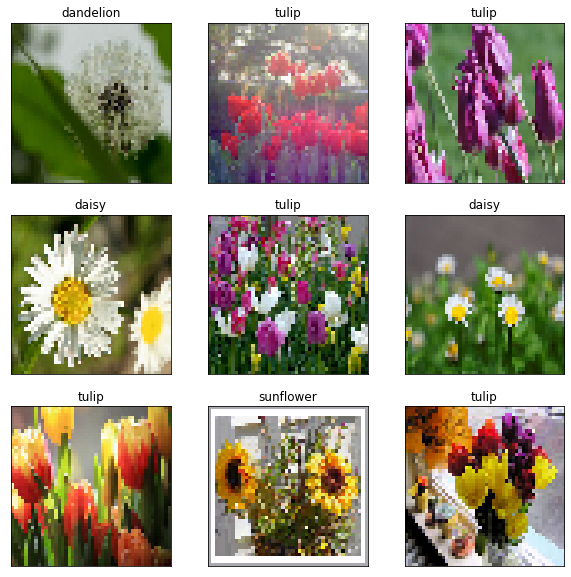

In [12]:
# Visualizing the Train Data

plt.figure(figsize=(10,10))

for i in range(9) :
  plt.subplot(3,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(i_train[i])
  plt.title(flowers[o_train[i]])
  i=i+1
plt.show()

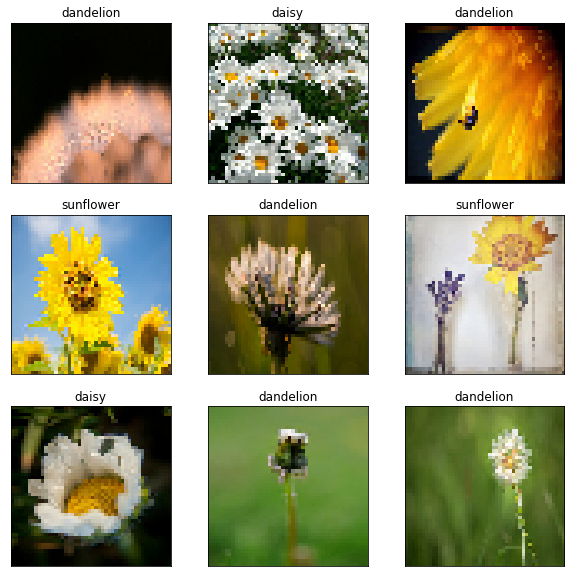

In [13]:
plt.figure(figsize=(10,10))

for i in range(9) :
  plt.subplot(3,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(i_test[i])
  plt.title(flowers[o_test[i]])
  i=i+1
plt.show()

# **4. DATA AUGMENTATION**

In [14]:
# As our training data is less, we are creating additional data from existing data using data augmentation

data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.1)
    ]
)

# **5. LOADING AND MODIFYING THE MODEL**

In [15]:
model = keras.applications.DenseNet201(
    include_top=False,
    weights='imagenet',
    input_shape=(48,48,3)
)

74850304/74836368 [==============================] - 2s 0us/step


In [16]:
model.trainable = False                 # freezing the weights of the model

# Data is Normalized while creating the dataset,so no need of Normalization

inputs = keras.Input(shape = (48,48,3))    # creating an input layer

x = data_augmentation(inputs)
x = model(x,training=False)

x = layers.GlobalAveragePooling2D()(x)      # adding pooling layer on top of the model

x = layers.Dropout(0.2)(x)

outputs = layers.Dense(5,activation = 'softmax')(x)

model = keras.Model(inputs,outputs)

In [17]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 sequential (Sequential)     (None, 48, 48, 3)         0         
                                                                 
 densenet201 (Functional)    (None, 1, 1, 1920)        18321984  
                                                                 
 global_average_pooling2d (G  (None, 1920)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1920)              0         
                                                                 
 dense (Dense)               (None, 5)                 9605      
                                                             

In [18]:
# Training the Top Layer

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [19]:
model.fit(i_train,o_train,epochs=15,validation_split=0.2)

Epoch 1/15
87/87 [==============================] - 50s 441ms/step - loss: 1.2799 - accuracy: 0.4828 - val_loss: 1.0511 - val_accuracy: 0.5882
Epoch 2/15
87/87 [==============================] - 33s 379ms/step - loss: 0.9951 - accuracy: 0.6275 - val_loss: 0.9359 - val_accuracy: 0.6676
Epoch 3/15
87/87 [==============================] - 34s 389ms/step - loss: 0.9245 - accuracy: 0.6557 - val_loss: 0.8838 - val_accuracy: 0.6864
Epoch 4/15
87/87 [==============================] - 32s 372ms/step - loss: 0.8626 - accuracy: 0.6705 - val_loss: 0.8644 - val_accuracy: 0.6777
Epoch 5/15
87/87 [==============================] - 33s 376ms/step - loss: 0.8420 - accuracy: 0.6857 - val_loss: 0.8342 - val_accuracy: 0.7023
Epoch 6/15
87/87 [==============================] - 33s 377ms/step - loss: 0.8187 - accuracy: 0.6915 - val_loss: 0.8191 - val_accuracy: 0.6994
Epoch 7/15
87/87 [==============================] - 34s 392ms/step - loss: 0.7916 - accuracy: 0.7016 - val_loss: 0.8173 - val_accuracy: 0.6879

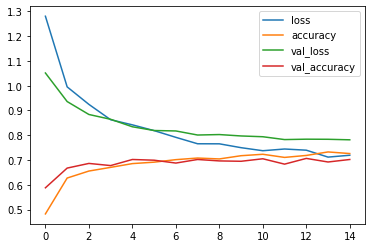

In [20]:
metr = pd.DataFrame(model.history.history).plot()

# **6. FINE TUNING THE MODEL**

In [21]:
model.trainable = True

model.compile(optimizer=keras.optimizers.Adam(1e-5),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [28]:
model.fit(i_train,o_train,epochs=15,validation_split=0.2)

Epoch 1/15
87/87 [==============================] - 171s 2s/step - loss: 0.1260 - accuracy: 0.9548 - val_loss: 0.7984 - val_accuracy: 0.7803
Epoch 2/15
87/87 [==============================] - 172s 2s/step - loss: 0.1206 - accuracy: 0.9606 - val_loss: 0.7257 - val_accuracy: 0.7876
Epoch 3/15
87/87 [==============================] - 173s 2s/step - loss: 0.1278 - accuracy: 0.9552 - val_loss: 0.7554 - val_accuracy: 0.8020
Epoch 4/15
87/87 [==============================] - 173s 2s/step - loss: 0.1061 - accuracy: 0.9620 - val_loss: 0.7242 - val_accuracy: 0.8078
Epoch 5/15
87/87 [==============================] - 171s 2s/step - loss: 0.1025 - accuracy: 0.9656 - val_loss: 0.7496 - val_accuracy: 0.7991
Epoch 6/15
87/87 [==============================] - 171s 2s/step - loss: 0.0827 - accuracy: 0.9725 - val_loss: 0.7608 - val_accuracy: 0.8020
Epoch 7/15
87/87 [==============================] - 171s 2s/step - loss: 0.0800 - accuracy: 0.9725 - val_loss: 0.7941 - val_accuracy: 0.7905
Epoch 8/15
87

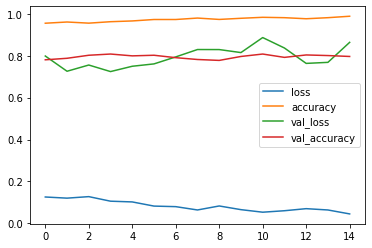

In [29]:
metr = pd.DataFrame(model.history.history).plot()

# **TESTING THE MODEL AND PREDICTING**

In [30]:
o_pred = model.predict(i_test)
o_pred = np.argmax(o_pred,axis=1)
o_pred

array([3, 0, 3, 1, 3, 2, 0, 3, 3, 0, 3, 0, 0, 3, 3, 1, 0, 0, 3, 4, 2, 4,
       3, 0, 4, 3, 3, 1, 4, 2, 0, 2, 1, 1, 2, 4, 0, 0, 4, 4, 2, 3, 1, 0,
       2, 2, 0, 4, 2, 1, 1, 0, 2, 1, 0, 4, 3, 2, 0, 2, 2, 2, 4, 1, 3, 4,
       3, 2, 3, 4, 1, 2, 2, 1, 4, 4, 1, 0, 4, 4, 1, 2, 4, 1, 3, 0, 1, 4,
       2, 0, 3, 0, 3, 0, 4, 3, 1, 2, 0, 3, 3, 3, 4, 2, 3, 3, 4, 0, 4, 2,
       2, 3, 1, 2, 3, 4, 3, 0, 2, 4, 4, 3, 3, 1, 0, 2, 3, 0, 4, 3, 3, 0,
       1, 0, 4, 0, 1, 3, 4, 1, 0, 4, 0, 4, 2, 1, 3, 3, 0, 0, 4, 0, 4, 2,
       4, 0, 2, 3, 3, 2, 3, 3, 4, 3, 0, 2, 3, 2, 4, 4, 1, 3, 3, 3, 4, 0,
       0, 4, 0, 4, 3, 4, 0, 2, 3, 2, 2, 1, 3, 4, 3, 1, 2, 0, 2, 1, 0, 4,
       1, 4, 3, 4, 1, 2, 0, 3, 3, 1, 4, 1, 2, 4, 3, 0, 0, 3, 1, 1, 3, 1,
       4, 3, 2, 4, 4, 3, 0, 3, 4, 0, 1, 1, 3, 4, 0, 0, 3, 4, 2, 4, 3, 3,
       4, 0, 2, 2, 4, 3, 3, 4, 1, 2, 3, 0, 4, 2, 1, 0, 2, 3, 3, 2, 1, 0,
       2, 3, 2, 2, 2, 3, 1, 1, 1, 4, 2, 3, 2, 3, 3, 0, 1, 4, 1, 1, 2, 3,
       0, 0, 3, 3, 2, 0, 0, 4, 4, 4, 3, 3, 1, 0, 3,

In [31]:
o_test

0      3
1      0
2      3
3      1
4      3
      ..
861    4
862    3
863    3
864    4
865    2
Name: label, Length: 866, dtype: int64

In [32]:
accuracy_score(o_pred,o_test)

0.8013856812933026

In [33]:
model.save('Flower Recognizer.hdf5')